In [24]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [2]:
data = pd.read_csv("housing.csv")
data

,RM,LSTAT,PTRATIO,MEDV
0,6.575,4.98,15.3,504000.0
1,6.421,9.14,17.8,453600.0
2,7.185,4.03,17.8,728700.0
3,6.998,2.94,18.7,701400.0
4,7.147,5.33,18.7,760200.0
...,...,...,...,...
484,6.593,9.67,21.0,470400.0
485,6.120,9.08,21.0,432600.0
486,6.976,5.64,21.0,501900.0
487,6.794,6.48,21.0,462000.0


In [3]:
data.head()

,RM,LSTAT,PTRATIO,MEDV
0,6.575,4.98,15.3,504000.0
1,6.421,9.14,17.8,453600.0
2,7.185,4.03,17.8,728700.0
3,6.998,2.94,18.7,701400.0
4,7.147,5.33,18.7,760200.0


In [4]:
print(data.info())
print(data.describe())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 489 entries, 0 to 488
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   RM       489 non-null    float64
 1   LSTAT    489 non-null    float64
 2   PTRATIO  489 non-null    float64
 3   MEDV     489 non-null    float64
dtypes: float64(4)
memory usage: 15.4 KB
None
               RM       LSTAT     PTRATIO          MEDV
count  489.000000  489.000000  489.000000  4.890000e+02
mean     6.240288   12.939632   18.516564  4.543429e+05
std      0.643650    7.081990    2.111268  1.653403e+05
min      3.561000    1.980000   12.600000  1.050000e+05
25%      5.880000    7.370000   17.400000  3.507000e+05
50%      6.185000   11.690000   19.100000  4.389000e+05
75%      6.575000   17.120000   20.200000  5.187000e+05
max      8.398000   37.970000   22.000000  1.024800e+06


In [5]:
print(data.isnull().sum)

<bound method DataFrame.sum of         RM  LSTAT  PTRATIO   MEDV
0    False  False    False  False
1    False  False    False  False
2    False  False    False  False
3    False  False    False  False
4    False  False    False  False
..     ...    ...      ...    ...
484  False  False    False  False
485  False  False    False  False
486  False  False    False  False
487  False  False    False  False
488  False  False    False  False

[489 rows x 4 columns]>


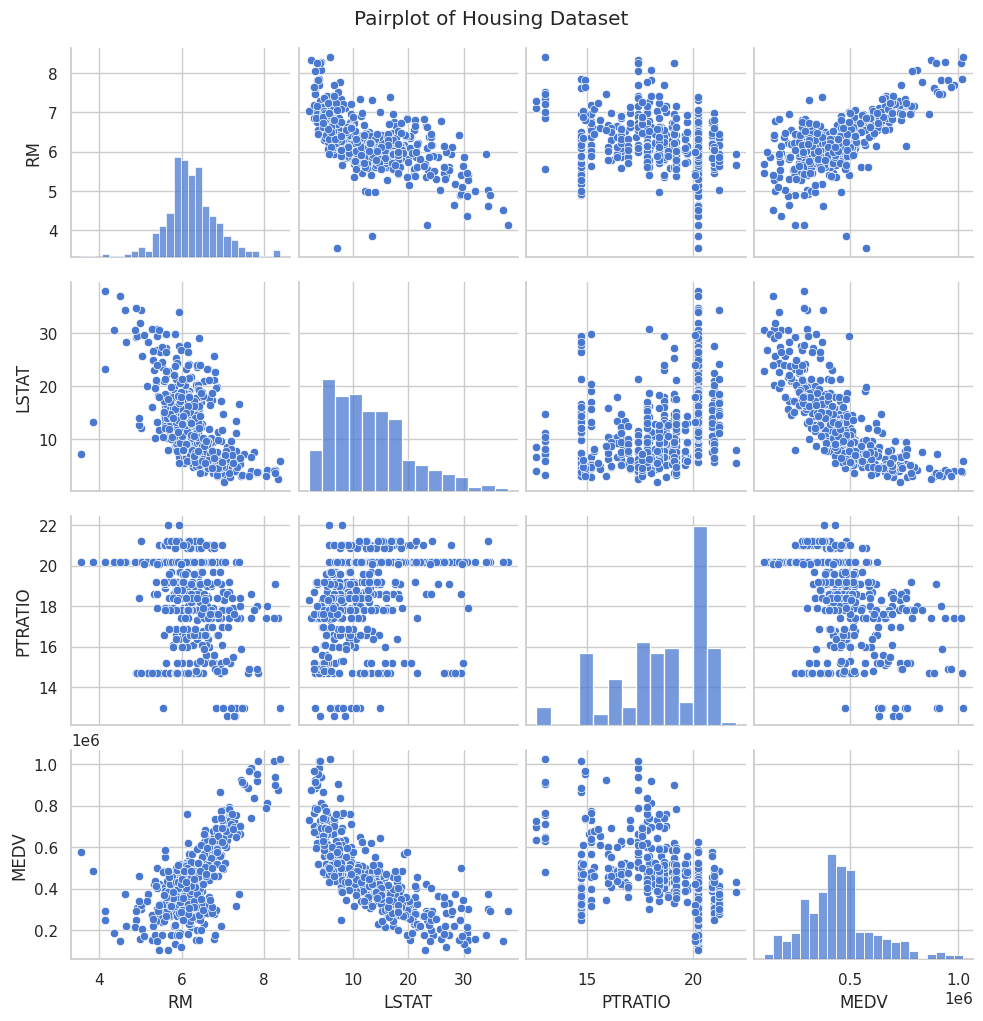

In [6]:
sns.set(style="whitegrid" , palette="muted")
sns.pairplot(data)
plt.suptitle("Pairplot of Housing Dataset", y=1.02)
plt.show()

In [7]:
correlation_matrix= data.corr()
print(correlation_matrix)

               RM     LSTAT   PTRATIO      MEDV
RM       1.000000 -0.612033 -0.304559  0.697209
LSTAT   -0.612033  1.000000  0.360445 -0.760670
PTRATIO -0.304559  0.360445  1.000000 -0.519034
MEDV     0.697209 -0.760670 -0.519034  1.000000


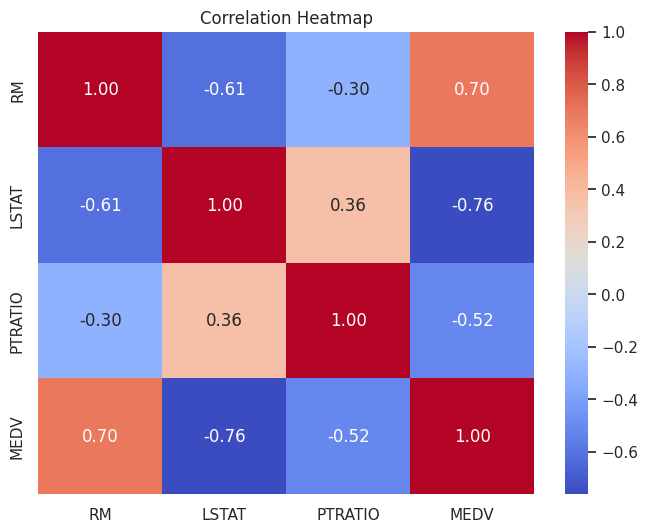

In [8]:
plt.figure(figsize=(8, 6))
sns.heatmap(data.corr(), annot=True, cmap='coolwarm', fmt='.2f', cbar=True)

# Display the plot
plt.title('Correlation Heatmap')
plt.show()

In [10]:
X= data[["RM", "LSTAT", "PTRATIO"]]
y= data["MEDV"]

In [17]:
X_Train, X_Test, y_Train, y_Test = train_test_split(X, y, test_size=0.2, random_state=42)


In [18]:
model = LinearRegression()
model.fit(X_Train, y_Train)


LinearRegression()

In [27]:
y_pred = model.predict(X_Test)
mae= mean_absolute_error(y_Test, y_pred)
mse= mean_squared_error(y_Test, y_pred)
r2_score= r2_score(y_Test, y_pred)

print("Mean Absolute Error:", mae)
print("Mean Squared Error:", mse)
print("R-squared Score:", r2_score)

Mean Absolute Error: 64277.28865670341
Mean Squared Error: 6789025559.265892
R-squared Score: 0.691093400309851


In [28]:
new_data = pd.DataFrame({
    'RM': [6.5],
    'LSTAT': [5.0],
    'PTRATIO': [15.0]
})

predicted_price = model.predict(new_data)
print(f"Predicted house price: ${predicted_price[0]:.2f}")

Predicted house price: $632652.64
